In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
import scipy.io
from sklearn.metrics import accuracy_score

# Part a

In [10]:
data = pd.read_csv('breast_data.csv',header=None)
pca = PCA(2)
df = pca.fit_transform(data)

In [8]:
def kmeans(x,k,mu,tol,no_of_iterations):

    centroids = x[mu, :] 
    distances = cdist(x, centroids ,'euclidean') 
     
    C = np.array([np.argmin(i) for i in distances]) 
     
    for m in range(no_of_iterations): 
        new_centroids = []
        for mu in range(k):
            temp_cent = x[C==mu].mean(axis=0) 
            new_centroids.append(temp_cent)
            
        if np.allclose(centroids,new_centroids,tol) :
            centroids = np.vstack(new_centroids)
        else:
            break
        distances = cdist(x, centroids ,'euclidean')
        C = np.array([np.argmin(i) for i in distances])
         
    return C 

[265 232]


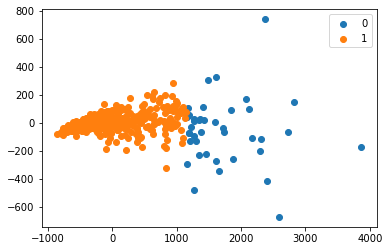

In [7]:
mu = np.random.choice(len(df), 2 , replace=False)

label = kmeans(df,2,mu,0.000001,10000)
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()


In [10]:
y = pd.read_csv('breast_labels.csv',header=None)
accuracy_score(y,label)

0.5887521968365553

# Part b
#### I choose initial points random so by each run you start with diffrenet point.

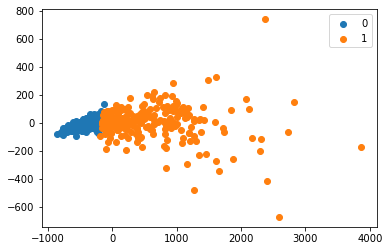

In [124]:
mu = np.random.choice(len(df), 2 , replace=False)

label = kmeans(df,2,mu,0.000001,10000)
unique_labels = np.unique(label)

for i in unique_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [125]:
y = pd.read_csv('breast_labels.csv',header=None)
accuracy_score(y,label)

0.8857644991212654

# Part c

In [126]:
mat_contents = scipy.io.loadmat("init_mu.mat")
mu_init= mat_contents['mu_init']
a = mu_init[[2,3],:]

In [127]:
def modify_kmeans(x,k,mu,tol,no_of_iterations):

    centroids = mu
    distances = cdist(x, centroids ,'euclidean') 
     
    C = np.array([np.argmin(i) for i in distances]) 
     
    for m in range(no_of_iterations): 
        new_centroids = []
        for mu in range(k):
            temp_cent = x[C==mu].mean(axis=0) 
            new_centroids.append(temp_cent)
            
        if np.allclose(centroids,new_centroids,tol) :
            centroids = np.vstack(new_centroids)
        else:
            break
        distances = cdist(x, centroids ,'euclidean')
        C = np.array([np.argmin(i) for i in distances])
         
    return C 

In [128]:
best_accuracy = []
for i in range(len(mu_init)-1):
    a = mu_init[[i,i+1],:]
    result = modify_kmeans(df,2,a,0.00001,10)
    accuracy = accuracy_score(y,result)
    best_accuracy.append(accuracy)
    print('\nfor initial center : \n' + str(a) + '\n accuracy is : ' + str(accuracy))


for initial center : 
[[ 1.1125  0.4038]
 [-0.7193 -0.3442]]
 accuracy is : 0.09666080843585237

for initial center : 
[[-0.7193 -0.3442]
 [-0.2734 -0.9801]]
 accuracy is : 0.9261862917398945

for initial center : 
[[-0.2734 -0.9801]
 [ 0.6774  1.8573]]
 accuracy is : 0.8453427065026362

for initial center : 
[[ 0.6774  1.8573]
 [-0.9365  0.3095]]
 accuracy is : 0.10720562390158173

for initial center : 
[[-0.9365  0.3095]
 [ 0.4257 -0.4891]]
 accuracy is : 0.9191564147627417

for initial center : 
[[ 0.4257 -0.4891]
 [-0.0745 -0.6949]]
 accuracy is : 0.09666080843585237

for initial center : 
[[-0.0745 -0.6949]
 [-1.3988 -0.1804]]
 accuracy is : 0.0843585237258348

for initial center : 
[[-1.3988 -0.1804]
 [ 0.1923  1.2563]]
 accuracy is : 0.8927943760984183

for initial center : 
[[0.1923 1.2563]
 [0.5804 1.9107]]
 accuracy is : 0.8681898066783831

for initial center : 
[[0.5804 1.9107]
 [0.6379 0.0272]]
 accuracy is : 0.6274165202108963

for initial center : 
[[ 0.6379  0.0272]
 [-

In [129]:
max(best_accuracy)

0.9261862917398945

### بعد از به دست اوردن میانگین های واقعی ممکن است خطای دسته بندی ما کم شود با توجه به توزیع داده ها و تعداد میانگین انتخابی میتوان خطا را کم کرد در این راستا می توان از متد هایی (elbow method) کمک گرفت

#### kmeans error is e<bayes error < 2e so usually it works Optimal if your dataset is linearly seperable